In [1]:
%load_ext autoreload
%autoreload 2

import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from bs4 import BeautifulSoup as bsoup
from thefuzz import fuzz

from typing import Any, List, Dict, Tuple, Optional

import constants, index_tools, data_tools, medical_code_tools

from utilities import *

if is_jupyter_notebook():
    from tqdm.notebook import tqdm
else:
    from tqdm import tqdm

# Data Index

In [2]:
biobank_index_full = index_tools.load_index()

In [3]:
biobank_index_full = index_tools.add_udi_names_to_index(biobank_index_full)
udi_map = index_tools.UDIMap(biobank_index_full)

# Load BioBank Data

In [90]:
correct_feature_typing = False
biobank_data_full = data_tools.load_biobank_data(constants.UK_BIOBANK_DATA_CSV_PATH, udi_map)
biobank_index_full = index_tools.add_biobank_info_to_index(biobank_index_full, biobank_data_full)
display(biobank_data_full.head())

UK BioBank Data Loaded.
Size: 9999 rows x 2781 columns


,eid,verbal_interview_duration,verbal_interview_duration_1.0,verbal_interview_duration_2.0,sex,birth_year,bp_device,bp_device_1.0,bp_device_2.0,bp_manual_device_ID,...,operative_procedures_OPCS4_secondary_0.82,operative_procedures_OPCS4_secondary_0.83,operative_procedures_OPCS4_secondary_0.84,operative_procedures_OPCS4_secondary_0.85,important_unlabeled_34,inpatient_record_format,inpatient_record_format_0.1,inpatient_record_format_0.2,inpatient_record_format_0.3,inpatient_record_format_0.4
0,1000013,485,NaN,NaN,1,1962,002817,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1,18,NaN,NaN,NaN,NaN
1,1000024,328,NaN,NaN,0,1941,001054,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1,6,NaN,NaN,NaN,NaN
2,1000036,364,NaN,NaN,0,1955,003159,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1,6,NaN,NaN,NaN,NaN
3,1000048,322,NaN,NaN,1,1941,003780,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1,18,NaN,NaN,NaN,NaN
4,1000055,477,NaN,NaN,0,1947,003156,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,5,6,18,NaN,NaN,NaN


In [92]:
feature

In [93]:
# convert features to correct type

if not correct_feature_typing:
    for feature in tqdm(biobank_index_full.query("type == 'Continuous' or type == 'Integer'")["name"]):
        print(feature)
        if feature is None:
            continue
        biobank_data_full[feature] = biobank_data_full[feature].apply(float)

correct_feature_typing = True

  0%|          | 0/866 [00:00<?, ?it/s]

verbal_interview_duration
verbal_interview_duration_1.0
verbal_interview_duration_2.0
birth_year
cancer_first_year_age
cancer_first_year_age_0.1
cancer_first_year_age_0.2
cancer_first_year_age_0.3
cancer_first_year_age_0.4
cancer_first_year_age_0.5
cancer_first_year_age_1.0
cancer_first_year_age_1.1
cancer_first_year_age_1.2
cancer_first_year_age_1.3
cancer_first_year_age_1.4
cancer_first_year_age_1.5
cancer_first_year_age_2.0
cancer_first_year_age_2.1
cancer_first_year_age_2.2
cancer_first_year_age_2.3
cancer_first_year_age_2.4
cancer_first_year_age_2.5
illness_first_year_age
illness_first_year_age_0.1
illness_first_year_age_0.2
illness_first_year_age_0.3
illness_first_year_age_0.4
illness_first_year_age_0.5
illness_first_year_age_0.6
illness_first_year_age_0.7
illness_first_year_age_0.8
illness_first_year_age_0.9
illness_first_year_age_0.10
illness_first_year_age_0.11
illness_first_year_age_0.12
illness_first_year_age_0.13
illness_first_year_age_0.14
illness_first_year_age_0.15
illne

disinterest_n_episodes
disinterest_n_episodes_1.0
disinterest_n_episodes_2.0
tobacco_smoking_current_pipe_cigar_n_daily_cigarettes
tobacco_smoking_current_pipe_cigar_n_daily_cigarettes_1.0
tobacco_smoking_current_pipe_cigar_n_daily_cigarettes_2.0
tobacco_smoking_current_pipe_cigar_stop_agge
tobacco_smoking_current_pipe_cigar_stop_agge_1.0
tobacco_smoking_current_pipe_cigar_stop_agge_2.0
None
cancer_dx_year_interpolated
cancer_dx_year_interpolated_0.1
cancer_dx_year_interpolated_0.2
cancer_dx_year_interpolated_0.3
cancer_dx_year_interpolated_0.4
cancer_dx_year_interpolated_0.5
cancer_dx_year_interpolated_1.0
cancer_dx_year_interpolated_1.1
cancer_dx_year_interpolated_1.2
cancer_dx_year_interpolated_1.3
cancer_dx_year_interpolated_1.4
cancer_dx_year_interpolated_1.5
cancer_dx_year_interpolated_2.0
cancer_dx_year_interpolated_2.1
cancer_dx_year_interpolated_2.2
cancer_dx_year_interpolated_2.3
cancer_dx_year_interpolated_2.4
cancer_dx_year_interpolated_2.5
cancer_dx_age_interpolated
cancer

illness_dx_age_interpolated_2.33
birth_weight
birth_weight_1.0
birth_weight_2.0
neuroticism_score
tobacco_smoking_pack_years
tobacco_smoking_pack_years_1.0
tobacco_smoking_pack_years_2.0
tobacco_smoking_pack_years_life_proportion
tobacco_smoking_pack_years_life_proportion_1.0
tobacco_smoking_pack_years_life_proportion_2.0
alcohol_last_comment_on_habits_age
assessment_age
assessment_age_1.0
assessment_age_2.0
recruitment_age
GI_bowel_openings_per_day_max
GI_bowel_openings_per_day_min
GI_bowel_openings_per_day_average
GI_IBS_work_weeks_absent_from_past_year
GI_IBS_work_weeks_suffering
heterozygosity
heterozygosity_PCA_corrected
missingness
genetic_PCs_0.1
genetic_PCs_0.2
genetic_PCs_0.3
genetic_PCs_0.4
genetic_PCs_0.5
genetic_PCs_0.6
genetic_PCs_0.7
genetic_PCs_0.8
genetic_PCs_0.9
genetic_PCs_0.10
genetic_PCs_0.11
genetic_PCs_0.12
genetic_PCs_0.13
genetic_PCs_0.14
genetic_PCs_0.15
genetic_PCs_0.16
genetic_PCs_0.17
genetic_PCs_0.18
genetic_PCs_0.19
genetic_PCs_0.20
genetic_PCs_0.21
geneti

# Identify Missing UDIs and create UDI lookup table to fill out

In [94]:
missing_name_index = index_tools.get_indices_missing_names(biobank_index_full)

In [95]:
biobank_index_full["name"].isna().mean()

0.0017979144192736426

# Clean + Reduce feature set

In [96]:
biobank_data = data_tools.clean_biobank_data(biobank_data_full)

reduced_feature_set = data_tools.create_reduced_feature_set(biobank_data)


biobank_index = biobank_index_full.loc[biobank_index_full["name"].isin(reduced_feature_set)].reset_index(drop=True)
biobank_data = biobank_data_full[reduced_feature_set]

# BioBank Code Download

In [97]:
medical_code_tools.download_biobank_code_data(code=198, overwrite=False)

code 198 files already exist.


In [98]:
medical_code_tools.download_all_biobank_codes(biobank_index, overwrite=False);

code 1 files already exist.
code 10 files already exist.
code 1001 files already exist.
code 1002 files already exist.
code 100258 files already exist.
code 100259 files already exist.
code 100264 files already exist.
code 100267 files already exist.
code 100286 files already exist.
code 100291 files already exist.
code 100292 files already exist.
code 100294 files already exist.
code 100295 files already exist.
code 100298 files already exist.
code 100299 files already exist.
code 100300 files already exist.
code 100301 files already exist.
code 100347 files already exist.
code 100348 files already exist.
code 100349 files already exist.
code 100351 files already exist.
code 100352 files already exist.
code 100353 files already exist.
code 100355 files already exist.
code 100356 files already exist.
code 100357 files already exist.
code 100358 files already exist.
code 100359 files already exist.
code 100360 files already exist.
code 100361 files already exist.
code 100369 files alrea

# BioBank Code Intersections

In [113]:
import glob

from collections.abc import Iterable

class MedicalCodeMapping:
    def __init__(self, biobank_index: pd.DataFrame):
        self.name_to_code_format_map = dict(biobank_index[["name", "data_code"]].values)
        self.code_format_lookup = self.get_code_format_info_lookup()
        
    def get_code_format_from_name(self, name: str) -> str:
        """ Gets the medical code format used by variable 'name'"""
        return self.name_to_code_format_map[name]
    
    def get_code_lookup_from_name(self, name: str):
        """ Gets the medical code format lookup from variable 'name'"""
        return self.code_format_lookup[self.get_code_format_from_name(name)]
    
    def name_has_code_format(self, name: str) -> bool:
        """ Checks if a variable 'name' has a code format"""
        return name in self.name_to_code_format_map
        
    def read_code_format_csv(self, code_format_csv_path: str) -> dict:
        """ Reads code format csv"""
        with open(code_format_csv_path, 'r') as code_format_csv_file:
            code_format_csv_str = code_format_csv_file.read()

        code_format_meaning_pairs = [code_format_meaning_pair.split(",", maxsplit=1)
                                     for code_format_meaning_pair in code_format_csv_str.split('\n')[1:]]
        return dict(code_format_meaning_pairs)

    def get_code_format_info_lookup(self) -> dict:
        """ Creates a code format info lookup dict."""

        code_format_info_lookup = {}
        for code_format_csv_path in glob.glob(os.path.join(constants.CODING_INFO_DIR_PATH, "code_lookup_*.csv")):
            code_format = code_format_csv_path.split("code_lookup_")[1].rstrip(".csv")
            code_format_description_path = code_format_csv_path.replace("lookup",
                                                                        "description").replace(".csv", ".txt")

            with open(code_format_description_path, 'r') as code_format_description_file:
                name, description, data_format = code_format_description_file.read().split("\n", maxsplit=2)

            code_values = self.read_code_format_csv(code_format_csv_path)
            
            code_format_info_lookup[code_format] = {"name": name, "desc": description,
                                             "data_format": data_format, "coded_values": code_values}
        return code_format_info_lookup
    
    def decode(self, coded_value: str, code_format: Optional[str] = None, name: Optional[str] = None):
        """ Decodes a coded value"""
        assert bool(code_format) != bool(name), "Only name or code should be provided."
        
        code_format = self.get_code_format_from_name(name) if name else code_format
        if code_format is None:
            return coded_value
        
        if isinstance(coded_value, Iterable) and not isinstance(coded_value, str):
            return [self.decode(coded_value_i, code_format=code_format) for coded_value_i in coded_value]
        
        return self.code_format_lookup[code_format]["coded_values"].get(str(coded_value), coded_value)

med_code_mapping = MedicalCodeMapping(biobank_index)

In [114]:
med_code_mapping.decode(code_format="946", coded_value="-818")
med_code_mapping.decode(code_format="9", coded_value="1")

'Male'

In [115]:
med_code_mapping.decode(name="sex", coded_value=biobank_data["sex"].astype(str));

In [116]:
biobank_data = pd.DataFrame({feature: med_code_mapping.decode(biobank_data[feature], name=feature)
                   for feature in biobank_data.columns})

In [133]:
(biobank_data_full.query("sex == '1'")["illness_code"] == '1437').mean() * 100

0.04302000430200043

In [138]:
med_code_mapping.get_code_lookup_from_name("illness_code")["coded_values"]

{'-1': 'substance abuse/dependency,1460,1269,N',
 '1065': 'hypertension,1081,1071,Y',
 '1066': 'heart/cardiac problem,1082,1071,Y',
 '1067': 'peripheral vascular disease,1084,1071,Y',
 '1068': 'venous thromboembolic disease,1085,1071,Y',
 '1072': 'essential hypertension,1089,1081,Y',
 '1073': 'gestational hypertension/pre-eclampsia,1090,1081,Y',
 '1074': 'angina,1091,1082,Y',
 '1075': 'heart attack/myocardial infarction,1092,1082,Y',
 '1076': 'heart failure/pulmonary odema,1093,1082,Y',
 '1077': 'heart arrhythmia,1094,1082,Y',
 '1078': 'heart valve problem/heart murmur,1095,1082,Y',
 '1079': 'cardiomyopathy,1096,1082,Y',
 '1080': 'pericardial problem,1097,1082,Y',
 '1081': 'stroke,1098,1083,Y',
 '1082': 'transient ischaemic attack (tia),1099,1083,Y',
 '1083': 'subdural haemorrhage/haematoma,1100,1083,Y',
 '1086': 'subarachnoid haemorrhage,1103,1098,Y',
 '1087': 'leg claudication/ intermittent claudication,1104,1084,Y',
 '1088': 'arterial embolism,1105,1084,Y',
 '1093': 'pulmonary embol

In [135]:
for key, desc in med_code_mapping.get_code_lookup_from_name("illness_code")["".items():
    if "mono" in desc.lower():
        print(key, desc)

AttributeError: 'dict' object has no attribute 'lower'

In [110]:
biobank_data["cancer_code"]

0                                           NaN
1                malignant melanoma,1067,1010,Y
2                        breast cancer,1007,0,Y
3                                           NaN
4                                           NaN
                         ...                   
9994    liver/hepatocellular cancer,1032,1002,Y
9995                     breast cancer,1007,0,Y
9996                                        NaN
9997                                        NaN
9998                                        NaN
Name: cancer_code, Length: 9999, dtype: object

0                             hypertension,1081,1071,Y
1                                                  NaN
2                                                  NaN
3                             hypertension,1081,1071,Y
4       heart attack/myocardial infarction,1092,1082,Y
                             ...                      
9994                                               NaN
9995                                angina,1091,1082,Y
9996                                               NaN
9997                gastric/stomach ulcers,1163,1154,Y
9998                                               NaN
Name: illness_code, Length: 9999, dtype: object

In [40]:
udi_map.get_udi("cancer_code")

'20001-0.0'

In [136]:
index_tools.term_search(biobank_index, "cancer")

['cancer_first_year_age',
 'illness_first_year_age',
 'n_cancers',
 'n_non_cancer_illnesses',
 'cancer_dx',
 'cancer_code',
 'illness_code',
 'cancer_dx_year_interpolated',
 'cancer_dx_age_interpolated',
 'illness_dx_year_interpolated',
 'illness_dx_age_interpolated',
 'cancer_dx_recording_time_method',
 'illness_dx_recording_time_method',
 'cancer_dx_date',
 'cancer_type_ICD10',
 'cancer_dx_age',
 'cancer_occurences',
 'cancer_tumor_histology',
 'cancer_tumor_behavior',
 'cancer_type_ICD9',
 'cancer_report_format']

In [137]:
med_code_mapping.get_code_format_from_name("cancer_code")

'3'

In [138]:
biobank_data["cancer_code"]

0                                           NaN
1                malignant melanoma,1067,1010,Y
2                        breast cancer,1007,0,Y
3                                           NaN
4                                           NaN
                         ...                   
9994    liver/hepatocellular cancer,1032,1002,Y
9995                     breast cancer,1007,0,Y
9996                                        NaN
9997                                        NaN
9998                                        NaN
Name: cancer_code, Length: 9999, dtype: object

# Feature Exploration

In [139]:
feature_data = {"feature": [], "feature_samples": [], "n_unique": []}

for column in tqdm(biobank_data.columns, desc="Analyzing features", unit=" feature"):
    unique_features = biobank_data[column].unique()
    feature_data["feature_samples"].append(np.random.choice(unique_features, min(5, len(unique_features))))
    feature_data["feature"].append(column)
    feature_data["n_unique"].append(len(unique_features))
    
feature_data = pd.DataFrame(feature_data)

Analyzing features:   0%|          | 0/490 [00:00<?, ? feature/s]

# Feature Index EDA

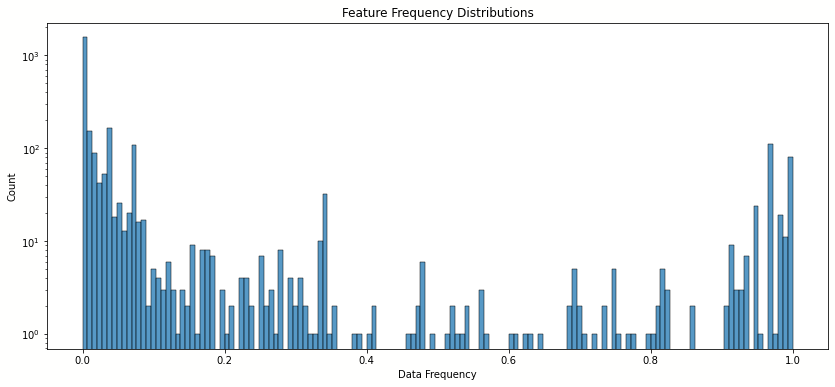

In [140]:
fig, ax = plt.subplots(figsize=(14, 6), facecolor="#fffffe")
sns.histplot(biobank_index_full["frequency"], ax=ax)
ax.set_yscale("log")
add_plt_labels(ax, "Data Frequency", "Count", "Feature Frequency Distributions")
plt.show()
fig.tight_layout()
fig.savefig(constants.COVER_PLOTS_GENERIC_FILE_PATH.format("feature_frequency_distribution.png"), facecolor="#fffffe")

# actual EDA

In [141]:
cancer_biobank = biobank_data.loc[~biobank_data["cancer_code"].isna()]

TypeError: The x variable is categorical, but one of ['numeric', 'datetime'] is required

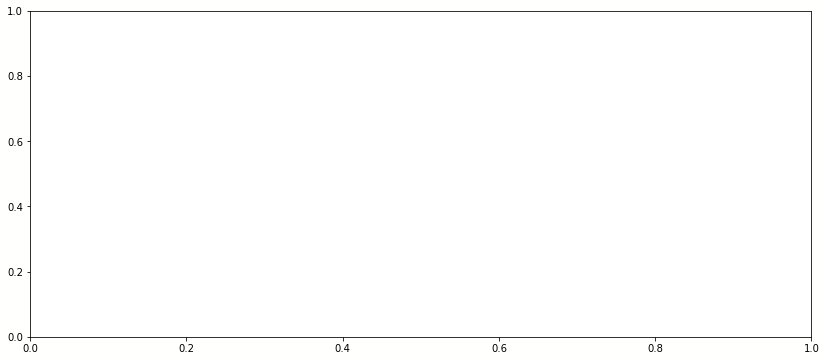

In [142]:
cancer_codes, counts = np.unique(cancer_biobank["cancer_code"], return_counts=True)

common_cancer_codes = cancer_codes[counts > 20]
common_cancer_biobank = cancer_biobank.loc[cancer_biobank["cancer_code"].isin(common_cancer_codes)]


fig, ax = plt.subplots(figsize=(14, 6), facecolor="#fffffe")
sns.kdeplot(data=common_cancer_biobank, x="cancer_dx_age_interpolated", hue="cancer_code", ax=ax, shade=True)
add_plt_labels(ax, "cancer_dx_age_interpolated", "Density")
fig.savefig(constants.COVER_PLOTS_GENERIC_FILE_PATH.format("cancer_onset_age.png"), facecolor="#fffffe")

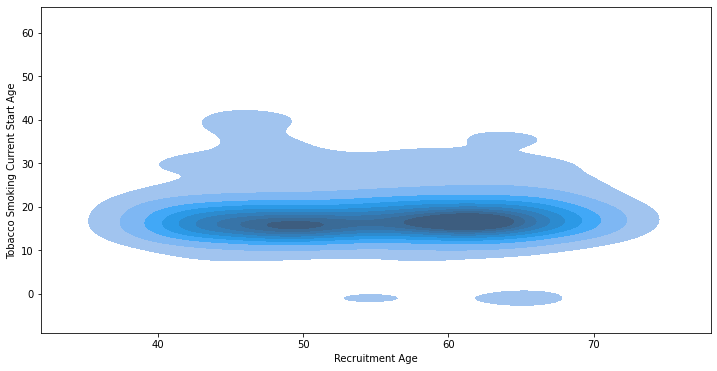

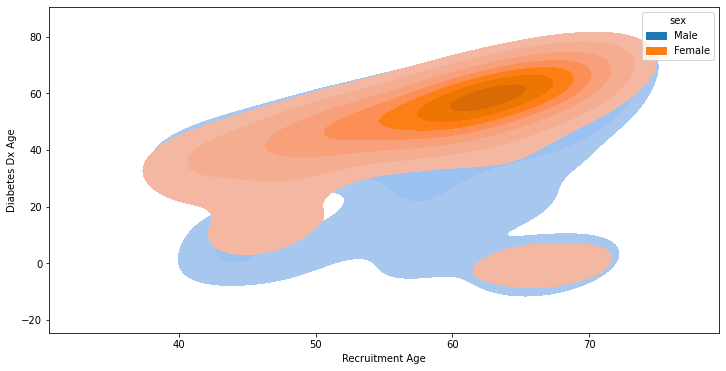

In [86]:
fig, ax = plt.subplots(figsize=(12, 6))
y = "tobacco_smoking_current_start_age"
x = "recruitment_age"

sns.kdeplot(data=biobank_data, y=y, x=x, ax=ax, fill=True)
add_plt_labels(ax, x, y)

y, x = "diabetes_dx_age", "recruitment_age"
fig, ax = plt.subplots(figsize=(12, 6))
sns.kdeplot(data=biobank_data, x=x, y=y, hue="sex", ax=ax, fill=True)
add_plt_labels(ax, x, y)

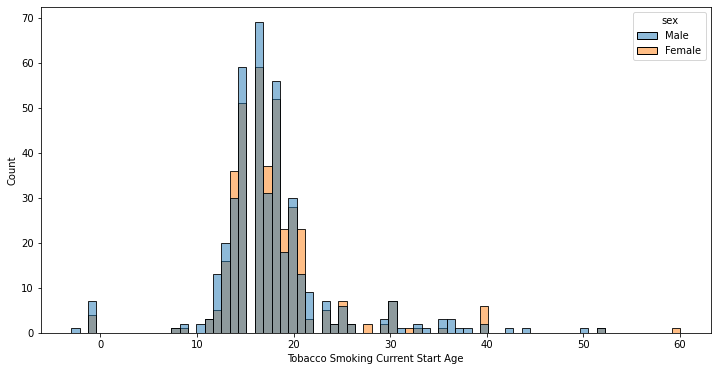

In [89]:
fig, ax = plt.subplots(figsize=(12, 6))
x="tobacco_smoking_current_start_age"
sns.histplot(data=biobank_data, x=x, hue="sex",  ax=ax)
add_plt_labels(ax, x, y="Count")

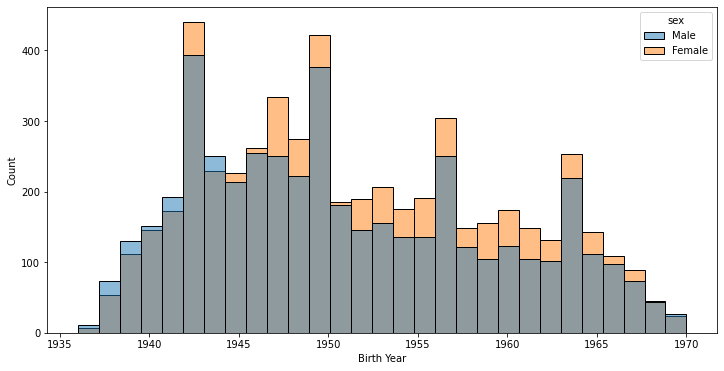

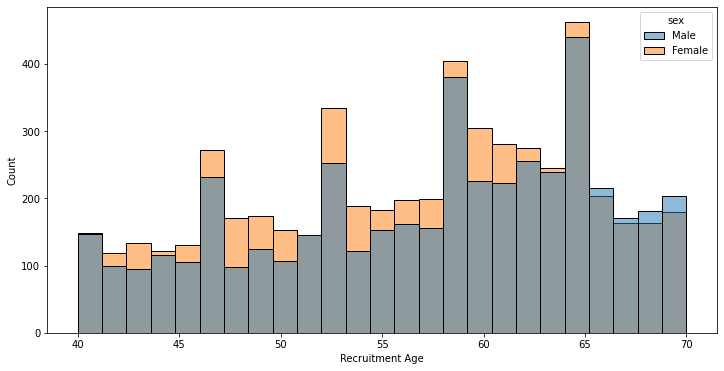

In [90]:
x, hue = "birth_year", "sex"
fig, ax = plt.subplots(figsize=(12, 6))
sns.histplot(data=biobank_data, x=x, hue=hue, ax=ax)
add_plt_labels(ax, x, y="Count")

x = "recruitment_age"
fig, ax = plt.subplots(figsize=(12, 6))
sns.histplot(data=biobank_data, x=x, hue=hue, ax=ax)
add_plt_labels(ax, x, y="Count")